D:\Programming\Python programs\Sushil Gautam\Computer Graphics


Enter x-min and y-min respectively:  40 40
Enter x-max and y-max respectively:  80 100
Enter initial point of line:  90 30
Enter final point of line:  30 110


[0, 1, 1, 0] [1, 0, 0, 1]
Before clipping		After clipping
(90.0, 30.0)		(72.5, 40.0)
(30.0, 110.0)		(47.5, 100.0)


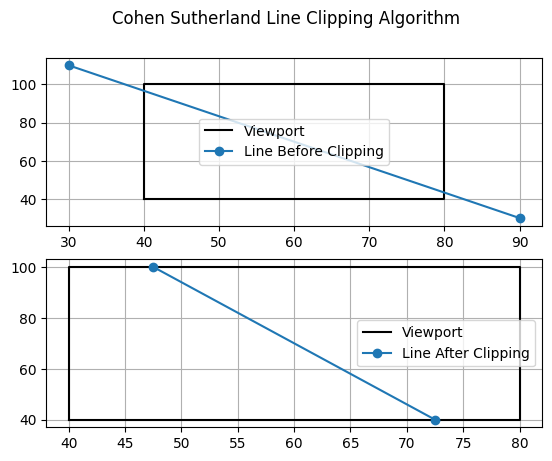

In [2]:
#This code has still some bugs and yet to solve
import os
print(os.getcwd())
import matplotlib.pyplot as plt
from copy import deepcopy
def cordinates_generator(x_list,y_list,rcode_start,rcode_end):
    slope=(y2-y1)/(x2-x1)
    # for starting point 
    if rcode_start[2]==0 and rcode_start[3]==1:#for left
        y_list[0]+= (xmin-x1)*slope
        x_list[0]=xmin
    if rcode_start[2]==1 and rcode_start[3]==0:#for right
        y_list[0]+= (xmax-x1)*slope
        x_list[0]=xmax
    if rcode_start[0]==1 and rcode_start[1]==0:#for top
        x_list[0]+= (ymax-y1)/slope
        y_list[0]=ymax
    if rcode_start[0]==0 and rcode_start[1]==1:#for bottom
        x_list[0]+= (ymin-y1)/slope
        y_list[0]=ymin
    # for end point 
    if rcode_end[2]==0 and rcode_end[3]==1:#for left
        y_list[1]+= (xmin-x2)*slope
        x_list[1]=xmin
    if rcode_end[2]==1 and rcode_end[3]==0:#for right
        y_list[1]+= (xmax-x2)*slope
        x_list[1]=xmax
    if rcode_end[0]==1 and rcode_end[1]==0:#for top
        x_list[1]+= (ymax-y2)/slope
        y_list[1]=ymax
    if rcode_end[0]==0 and rcode_end[1]==1:#for bottom
        x_list[1]+= (ymin-y2)/slope
        y_list[1]=ymin
    
# rcode generator
def rcode_generator(copyx,copyy,rcode_start,rcode_end):
    region_code=[0,0,0,0]
    flag=0
    # generate rcode for starting point
    if y1>ymax:
        rcode_start[0]=1 #top
        flag=1
    if y1<ymin:
        rcode_start[1]=1 # Bottom
        flag=1
    if x1>xmax:
        rcode_start[2]=1 # right
        flag=1
    if x1<xmin:
        rcode_start[3]=1 # left
        flag=1
    # generate rcode for end point
    if y2>ymax:
        rcode_end[0]=1 #top
        flag=1
    if y2<ymin:
        rcode_end[1]=1 # Bottom
        flag=1
    if x2>xmax:
        rcode_end[2]=1 # right
        flag=1
    if x2<xmin:
        rcode_end[3]=1 # left
        flag=1
    print(rcode_start,rcode_end)
    if flag==0:
        print("Line is already inside viewport")
        exit(0)
    # again using flag for calculation region code
    flag=1
    for i in range(3):
        region_code[i]=rcode_start[i] and rcode_end[i]
        if region_code[i]==1:
            flag=0
    if flag==0:
        print("Line is completely outside the window")
    else:
        cordinates_generator(copyx,copyy,rcode_start,rcode_end)
# main program start
xmin,ymin=map(float,input("Enter x-min and y-min respectively: ").split())
xmax,ymax=map(float,input("Enter x-max and y-max respectively: ").split())
viewport=[[xmin,ymin],[xmax,ymin],[xmax,ymax],[xmin,ymax]]
x,y=zip(*viewport)
fig, [ax, ax1] = plt.subplots(2, 1)
ax.plot(x+(x[0],),y+(y[0],),color="black",label="Viewport")
ax1.plot(x+(x[0],),y+(y[0],),color="black",label="Viewport")

rcode_start,rcode_end=[0,0,0,0],[0,0,0,0]
x1,y1=map(float,input("Enter initial point of line: ").split())
x2,y2=map(float,input("Enter final point of line: ").split())
x_list=[x1,x2]
y_list=[y1,y2]
copyx,copyy=deepcopy(x_list),deepcopy(y_list)
ax.plot(x_list,y_list,marker='o',label="Line Before Clipping")
rcode_generator(copyx,copyy,rcode_start,rcode_end)
ax1.plot(copyx,copyy,marker='o',label="Line After Clipping")
print("Before clipping\t\tAfter clipping")
for i in range(2):
    print(f"{x_list[i],y_list[i]}\t\t{round(copyx[i],2),round(copyy[i],2)}")
# plt.grid(True)
ax1.legend()
ax.legend()
ax.grid(True)
ax1.grid(True)

plt.suptitle("Cohen Sutherland Line Clipping Algorithm")
plt.show()
# top problem 
# right 
# completely outside huda 2nd plot na dekhauni
